In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def naive_roc_auc_score(y_true, y_pred):
  
  y_true = y_true.to_numpy()
  
  num_same_sign = 0
  num_pairs = 0
  
  for a in range(len(y_true)):
    for b in range(len(y_true)):
      if y_true[a] > y_true[b]:
        num_pairs += 1
        if y_pred[a] > y_pred[b]:
          num_same_sign += 1
        elif y_pred[a] == y_pred[b]:
          num_same_sign += .5
        
  return num_same_sign / num_pairs

# score = make_scorer(naive_roc_auc_score, greater_is_better=True)

In [9]:
def create_model():
 # create model
 model = Sequential()
 model.add(Dense(29, input_shape=(29,), activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(30, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.2))
 model.add(Dense(30, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(20, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(1))
 # Compile model
 opt = optimizers.Adam(learning_rate=0.003)
 model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy'])
 return model

In [10]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['LUMO_calc']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [11]:
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasRegressor(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_cv = grid.fit(X_train, y_train)
# summarize results
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))
print('Train Mean Absolute Error:', abs(grid_cv.predict(X_train) - y_train), 'degrees.')
print('Test Mean Absolute Error:', abs(grid_cv.predict(X_test) - y_test), 'degrees.')

# prediction = model.predict(X_test)
# mse = mean_squared_error(y_test, prediction)
# #calculate R-squared of regression model
# r_squared = model.score(X_test, y_test)

#view R-squared value
print("Train R2: ", r2_score(y_train, grid_cv.predict(X_train)))
print("Test R2: ", r2_score(y_test, grid_cv.predict(X_test)))
# rmse = mse**.5
print("Train MSE: ", mean_squared_error(y_train, grid_cv.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, grid_cv.predict(X_test)))

Param for GS {'batch_size': 80, 'epochs': 100}
CV score for GS 0.8172428867385584
Train AUC ROC Score for GS:  0.8692899057286484
Test AUC ROC Score for GS:  0.867076895140775
Train Mean Absolute Error: 33399    0.253478
33689    0.178474
15746    0.002817
29123    0.073293
7868     0.181735
           ...   
28017    0.126056
50496    0.334771
29199    0.239873
40061    0.061364
17673    0.332923
Name: LUMO_calc, Length: 41004, dtype: float64 degrees.
Test Mean Absolute Error: 29860    0.105349
46773    0.495110
35540    0.768989
42760    0.180433
19319    0.166355
           ...   
27088    0.453197
26941    0.037750
46093    0.024056
19342    0.306195
47488    0.568927
Name: LUMO_calc, Length: 10252, dtype: float64 degrees.
Train R2:  0.8229724264615681
Test R2:  0.8172052771764
Train MSE:  0.052376772973704626
Test MSE:  0.05440292246057565


In [14]:
def create_new_model():
 # create model
 model = Sequential()
 model.add(Dense(29, input_shape=(29,), activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(30, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.2))
 model.add(BatchNormalization())
 model.add(Dense(30, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.2))
 model.add(BatchNormalization())
 model.add(Dense(30, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(30, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(20, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(20, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.2))
 model.add(BatchNormalization())
 model.add(Dense(10, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(1))
 # Compile model
 opt = optimizers.Adam(learning_rate=0.003)
 model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy'])
 return model

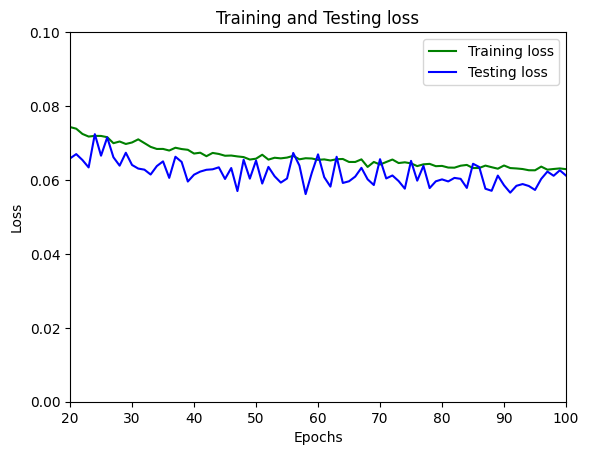

In [15]:
model = KerasRegressor(model=create_new_model, verbose=0)
model.fit(X_train, y_train, epochs=100, batch_size=80, validation_data=(X_test, y_test))
loss_train = model.history_['loss']
loss_val = model.history_['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Testing loss')
plt.xlim(20, 100)
plt.ylim(0, .1)
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasRegressor(model=create_new_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_cv = grid.fit(X_train, y_train)
# summarize results
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))
print('Train Mean Absolute Error:', abs(grid_cv.predict(X_train) - y_train), 'degrees.')
print('Test Mean Absolute Error:', abs(grid_cv.predict(X_test) - y_test), 'degrees.')

# prediction = model.predict(X_test)
# mse = mean_squared_error(y_test, prediction)
# #calculate R-squared of regression model
# r_squared = model.score(X_test, y_test)

#view R-squared value
print("Train R2: ", r2_score(y_train, grid_cv.predict(X_train)))
print("Test R2: ", r2_score(y_test, grid_cv.predict(X_test)))
# rmse = mse**.5
print("Train MSE: ", mean_squared_error(y_train, grid_cv.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, grid_cv.predict(X_test)))

KeyboardInterrupt: 

In [ ]:
data = pd.read_csv('NF_Descriptors.csv')
data = data.dropna()
y = data['LUMO_calc']
X = data.loc[:, ['Max Partial Charge', 'NO Count','H Count',
         'C Count', 'N Count', 'Double Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [ ]:
def create_alt_model():
 # create model
 model = Sequential()
 model.add(Dense(6, input_shape=(6,), activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(6, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.2))
 model.add(BatchNormalization())
 model.add(Dense(2, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(1))
 # Compile model
 opt = optimizers.Adam(learning_rate=0.003)
 model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy'])
 return model

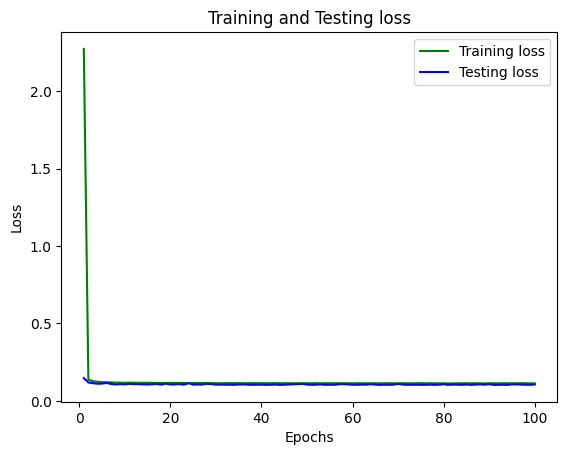

In [ ]:
model = KerasRegressor(model=create_alt_model, verbose=0)
model.fit(X_train, y_train, epochs=100, batch_size=80, validation_data=(X_test, y_test))
loss_train = model.history_['loss']
loss_val = model.history_['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasRegressor(model=create_alt_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_cv = grid.fit(X_train, y_train)
# summarize results
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))
print('Train Mean Absolute Error:', abs(grid_cv.predict(X_train) - y_train), 'degrees.')
print('Test Mean Absolute Error:', abs(grid_cv.predict(X_test) - y_test), 'degrees.')

# prediction = model.predict(X_test)
# mse = mean_squared_error(y_test, prediction)
# #calculate R-squared of regression model
# r_squared = model.score(X_test, y_test)

#view R-squared value
print("Train R2: ", r2_score(y_train, grid_cv.predict(X_train)))
print("Test R2: ", r2_score(y_test, grid_cv.predict(X_test)))
# rmse = mse**.5
print("Train MSE: ", mean_squared_error(y_train, grid_cv.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, grid_cv.predict(X_test)))

Param for GS {'batch_size': 80, 'epochs': 100}
CV score for GS 0.6493078382525238
Train AUC ROC Score for GS:  0.808287767097978
Test AUC ROC Score for GS:  0.8070828604161722
Train Mean Absolute Error: 33399    0.348214
33689    0.176154
15746    0.096442
29123    0.348325
7868     0.271313
           ...   
28017    0.145056
50496    0.265368
29199    0.000882
40061    0.224427
17673    0.354450
Name: LUMO_calc, Length: 41004, dtype: float64 degrees.
Test Mean Absolute Error: 29860    0.150072
46773    0.451150
35540    0.718411
42760    0.152802
19319    0.235493
           ...   
27088    0.529064
26941    0.075717
46093    0.060632
19342    0.418348
47488    0.556230
Name: LUMO_calc, Length: 10252, dtype: float64 degrees.
Train R2:  0.659798845416507
Test R2:  0.6591813904648437
Train MSE:  0.10065459455186772
Test MSE:  0.10143360870190549
